# Dynamic Time Wrapping

## Mengimport Library

Kode tersebut menyiapkan seluruh konfigurasi dasar yang diperlukan untuk proses perhitungan Dynamic Time Warping (DTW) antara rekaman suara lama dan rekaman suara baru. Pertama, ditentukan nilai sampling rate (`SR = 22050`) dan jumlah koefisien MFCC (`N_MFCC = 13`) yang akan digunakan untuk ekstraksi fitur audio. Variabel `BASE_DIR` menunjuk ke folder utama penyimpanan data, lalu `OLD_DIRS` berisi path ke dua jenis rekaman lama, yaitu folder *buka* dan *tutup*. Selanjutnya, `NEW_FILES` mendefinisikan lokasi dua file audio baru yang akan dibandingkan dengan data lama, yaitu `bukabaru.wav` dan `tutupbaru.wav`. Terakhir, `OUT_CSV` menentukan nama file output tempat seluruh hasil komputasi DTW akan disimpan dalam format CSV. Kode ini berfungsi sebagai tahap inisialisasi sebelum proses ekstraksi MFCC, perhitungan DTW, dan analisis lebih lanjut dijalankan.

In [53]:
import os
import librosa
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

SR = 22050
N_MFCC = 13

BASE_DIR = '/mnt/data/irna_unzipped/user1'

OLD_DIRS = {
    'buka': os.path.join(BASE_DIR, 'buka'),
    'tutup': os.path.join(BASE_DIR, 'tutup'),
}

NEW_FILES = {
    'buka_baru': os.path.join(BASE_DIR, 'bukabaru.wav'),
    'tutup_baru': os.path.join(BASE_DIR, 'tutupbaru.wav'),
}

OUT_CSV = 'dtw_results.csv'


## Fungsi Extract dan DTW

Fungsi `extract_mfcc` dan `dtw_distance` berfungsi untuk memproses dan membandingkan sinyal audio dalam bentuk fitur MFCC. `extract_mfcc` mengambil path file audio, memuatnya dengan sampling rate tertentu, dan mengekstraksi **Mel-Frequency Cepstral Coefficients (MFCC)** sejumlah `n_mfcc`, yang merepresentasikan karakteristik spektral suara secara ringkas. Sedangkan `dtw_distance` menghitung jarak antara dua matriks MFCC menggunakan algoritma **Dynamic Time Warping (DTW)**, yang menyesuaikan pergeseran waktu agar dua sinyal sebanding. Fungsi ini mengembalikan tiga nilai: `raw` (biaya total DTW), `norm` (biaya total dinormalisasi terhadap panjang lintasan untuk memperhitungkan durasi berbeda), dan `path_len` (jumlah langkah sepanjang lintasan optimal), sehingga memungkinkan analisis kesamaan atau perbedaan antara dua audio.


In [54]:
def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    # Load audio dari folder hasil ekstraksi ZIP kamu
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc


def dtw_distance(m1, m2, metric='euclidean'):
    # Hitung DTW antara 2 MFCC
    D, wp = librosa.sequence.dtw(X=m1, Y=m2, metric=metric)

    raw = D[-1, -1]         # total cost
    path_len = len(wp)      # panjang lintasan
    norm = raw / path_len if path_len > 0 else np.inf  # normalisasi

    return float(raw), float(norm), int(path_len)


## Collect Data Lama

Kode ini berfungsi sebagai tahap persiapan untuk analisis kesamaan rekaman suara menggunakan fitur audio MFCC. Pertama, direktori utama (`BASE`) dan folder rekaman lama (`OLD_DIRS` untuk *buka* dan *tutup*) ditentukan, sementara `NEW_FILES` disiapkan untuk menampung file audio baru yang akan dibandingkan. Sampling rate (`SR = 16000`) dan jumlah koefisien MFCC (`N_MFCC = 20`) ditetapkan untuk ekstraksi fitur. Script kemudian mengumpulkan semua file WAV dari folder lama, memeriksa keberadaan folder, dan menampilkan jumlah file per kategori. Selanjutnya, MFCC dari setiap file lama diekstraksi menggunakan fungsi `extract_mfcc` dan disimpan dalam dictionary `old_mfcc`. Jika ada file baru, MFCC-nya juga dapat diekstraksi dan disimpan di `new_mfcc`. Secara keseluruhan, kode ini menyiapkan seluruh data audio dalam bentuk fitur numerik yang siap untuk dianalisis atau dibandingkan lebih lanjut, misalnya dengan metode DTW.


In [55]:
import os

def walk_all(root="/mnt/data"):
    for path, dirs, files in os.walk(root):
        print("PATH :", path)
        print(" DIRS:", dirs)
        print(" FILES:", files)
        print("-" * 60)

walk_all("/mnt/data/irna_unzipped")


In [56]:
print(os.listdir("/mnt"))
print(os.listdir("/"))


[]
['opt', 'libx32', 'tmp', 'proc', 'dev', 'bin', 'mnt', 'root', 'srv', 'home', 'var', 'etc', 'sbin', 'usr', 'boot', 'sys', 'lib32', 'lib64', 'media', 'lib', 'run', 'kaggle', 'content', '.dockerenv', 'datalab', 'tools', 'python-apt', 'python-apt.tar.xz', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.1-1_all.deb']


In [57]:
from google.colab import files
uploaded = files.upload()

Saving user1 irna.zip to user1 irna (2).zip


In [58]:
import os
print(os.listdir())

['.config', 'user1 irna (2).zip', 'user1 irna (1).zip', 'rekaman_irna', 'dtw_results.csv', 'user1 irna.zip', 'sample_data']


In [59]:
import zipfile
import os

# ============================
# ZIP SESUAI DENGAN FILE KAMU
# ============================
zip_path = "user1 irna.zip"        # nama ZIP sesuai os.listdir(".")
extract_path = "rekaman_irna"      # folder tujuan ekstraksi (ubah dari silvi ke irna)

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

# Cek isi folder hasil ekstraksi
print("Isi folder rekaman_irna:")
print(os.listdir(extract_path))

# Jika ada folder 'user1' di dalamnya, cek isinya juga
user1_path = os.path.join(extract_path, "user1")

if os.path.exists(user1_path):
    print("\nIsi folder rekaman_irna/user1:")
    print(os.listdir(user1_path))
else:
    print("\nTidak ada folder 'user1' di dalam rekaman_irna.")



Isi folder rekaman_irna:
['user1']

Isi folder rekaman_irna/user1:
['buka', 'tutup']


In [60]:
for path, dirs, files in os.walk("rekaman_irna"):
    print("PATH :", path)
    print("DIRS :", dirs)
    print("FILES:", files)
    print("-" * 50)


PATH : rekaman_irna
DIRS : ['user1']
FILES: []
--------------------------------------------------
PATH : rekaman_irna/user1
DIRS : ['buka', 'tutup']
FILES: []
--------------------------------------------------
PATH : rekaman_irna/user1/buka
DIRS : []
FILES: ['buka2 (41).wav', 'buka2 (61).wav', 'buka2 (20).wav', 'buka2 (69).wav', 'buka2 (40).wav', 'buka2 (100).wav', 'buka2 (21).wav', 'buka2 (19).wav', 'buka2 (37).wav', 'buka2 (57).wav', 'buka2 (23).wav', 'buka2 (90).wav', 'buka2 (27).wav', 'buka2 (31).wav', 'buka2 (47).wav', 'buka2 (44).wav', 'buka2 (99).wav', 'buka2 (5).wav', 'buka2 (81).wav', 'buka2 (79).wav', 'buka2 (89).wav', 'buka2 (52).wav', 'buka2 (64).wav', 'buka2 (62).wav', 'buka2 (82).wav', 'buka2 (65).wav', 'buka2 (71).wav', 'buka2 (76).wav', 'buka2 (4).wav', 'buka2 (77).wav', 'buka2 (67).wav', 'buka2 (48).wav', 'buka2 (25).wav', 'buka2 (97).wav', 'buka2 (85).wav', 'buka2 (55).wav', 'buka2 (16).wav', 'buka2 (66).wav', 'buka2 (95).wav', 'buka2 (75).wav', 'buka2 (2).wav', 'buka

In [61]:
import os
import librosa
import numpy as np
from glob import glob
from tqdm import tqdm


# ============================
# 1. SET PATH DATA (SESUAI ZIP IRNA)
# ============================

BASE = "rekaman_irna/user1"   # hasil ekstraksi ZIP kamu

OLD_DIRS = {
    "buka":  os.path.join(BASE, "buka"),
    "tutup": os.path.join(BASE, "tutup"),
}

# File baru bisa ditambahkan nanti kalau ada
NEW_FILES = {
    # "buka_baru": "buka_baru.wav",
    # "tutup_baru": "tutup_baru.wav"
}


# ============================
# 2. FUNGSI EXTRACT MFCC
# ============================

SR = 16000
N_MFCC = 20

def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc


# ============================
# 3. COLLECT FILE DATA LAMA
# ============================

print("Mengumpulkan daftar file data lama...\n")

old_files = {}
for label, folder in OLD_DIRS.items():

    if not os.path.exists(folder):
        raise FileNotFoundError(f"Folder tidak ditemukan: {folder}")

    pattern = os.path.join(folder, "*.wav")
    files = sorted(glob(pattern))

    print(f"{label} → {len(files)} file ditemukan")
    old_files[label] = files


# ============================
# 4. EKSTRAK MFCC DATA LAMA
# ============================

print("\nEkstrak MFCC untuk data lama...\n")

old_mfcc = {}
for label, files in old_files.items():
    old_mfcc[label] = {}
    for f in tqdm(files, desc=f"MFCC {label}"):
        old_mfcc[label][f] = extract_mfcc(f)


# ============================
# 5. EKSTRAK MFCC UNTUK FILE BARU (opsional)
# ============================

new_mfcc = {}

if len(NEW_FILES) > 0:
    print("\nEkstrak MFCC untuk file baru...\n")

    for name, path in NEW_FILES.items():
        if not os.path.exists(path):
            raise FileNotFoundError(f"File baru tidak ditemukan: {path}")
        new_mfcc[name] = extract_mfcc(path)


print("\nSELESAI! MFCC berhasil diekstrak.")


Mengumpulkan daftar file data lama...

buka → 100 file ditemukan
tutup → 100 file ditemukan

Ekstrak MFCC untuk data lama...



MFCC tutup: 100%|██████████| 100/100 [00:01<00:00, 77.31it/s]


SELESAI! MFCC berhasil diekstrak.


## Perhitungan DTW

Kode ini bertugas melakukan perhitungan kesamaan antara rekaman audio baru dan rekaman lama menggunakan metode **Dynamic Time Warping (DTW)**, kemudian menyimpan hasilnya dalam bentuk CSV. Pertama, sebuah list `rows` dibuat untuk menampung hasil perhitungan. Script kemudian melakukan iterasi untuk setiap file audio baru (`new_mfcc`) dan membandingkannya dengan seluruh file lama yang telah dikelompokkan per label. Untuk setiap pasangan file baru-lama, MFCC dari file lama diambil, lalu fungsi `dtw_distance` digunakan untuk menghitung jarak DTW, termasuk `raw_cost` (biaya total), `normalized_cost` (biaya total dinormalisasi terhadap panjang lintasan), dan `path_len` (jumlah langkah lintasan optimal). Setiap hasil perhitungan disimpan sebagai dictionary ke dalam `rows`. Setelah semua iterasi selesai, data dikonversi menjadi **DataFrame pandas** dan disimpan ke file CSV yang ditentukan oleh `OUT_CSV`, sehingga semua hasil perbandingan siap dianalisis lebih lanjut.


In [65]:
rows = []
print("Menghitung DTW...")

# Loop MFCC file baru
for new_name, new_feat in new_mfcc.items():

    # Loop semua label lama
    for label, file_list in old_files.items():

        # Loop setiap file lama dalam label tersebut
        for old_path in tqdm(file_list, desc=f"DTW {new_name} vs {label}", leave=False):

            # Ambil MFCC lama
            m_old = old_mfcc[label][os.path.basename(old_path)]

            # Hitung DTW
            raw_cost, norm_cost, path_len = dtw_distance(m_old, new_feat)

            # Simpan hasil
            rows.append({
                'new_file': new_name,
                'old_label': label,
                'old_path': old_path,
                'raw_cost': raw_cost,
                'normalized_cost': norm_cost,
                'path_len': path_len
            })

# Buat DataFrame dan simpan
df = pd.DataFrame(rows)
df.to_csv(OUT_CSV, index=False)
print(f"Hasil tersimpan ke {OUT_CSV}")


Menghitung DTW...
Hasil tersimpan ke dtw_results.csv


## Kemiripan data lama dan baru

Kode ini melakukan proses otomatis untuk membandingkan rekaman suara baru dengan rekaman lama menggunakan **MFCC** dan **Dynamic Time Warping (DTW)**. Pertama, direktori dasar dan folder lama (`buka` dan `tutup`) ditentukan, lalu satu file dari masing-masing kategori lama dipilih secara otomatis sebagai file baru (`NEW_FILES`). Fungsi `extract_mfcc` mengekstraksi fitur MFCC dari setiap file audio, sedangkan `dtw_distance` menghitung jarak DTW antara MFCC file lama dan baru. Script kemudian memuat semua file lama, mengekstrak MFCC-nya, dan mengekstrak MFCC file baru. Selanjutnya, perhitungan DTW dilakukan untuk semua pasangan file baru-lama, dan nilai jarak yang dinormalisasi disimpan dalam DataFrame `df` dan diekspor ke CSV. Terakhir, script menampilkan lima file lama yang paling mirip dengan masing-masing file baru berdasarkan **normalized cost**, sehingga memudahkan identifikasi kesamaan suara.


In [67]:
import os
import librosa
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

# ============================
# PATH DASAR SESUAI ZIP IRNA
# ============================
BASE = "rekaman_irna/user1"

OLD_DIRS = {
    "buka":  os.path.join(BASE, "buka"),
    "tutup": os.path.join(BASE, "tutup"),
}

# ============================
# AMBIL FILE BARU DARI FOLDER
# ============================

# Ambil salah satu file buka & tutup sebagai file "baru"
buka_files = sorted(glob(os.path.join(OLD_DIRS["buka"], "*.wav")))
tutup_files = sorted(glob(os.path.join(OLD_DIRS["tutup"], "*.wav")))

NEW_FILES = {
    "buka_baru": buka_files[0],     # file buka pertama
    "tutup_baru": tutup_files[0],   # file tutup pertama
}

print("File baru otomatis dipilih:")
print(NEW_FILES)

# ============================
# FUNGSI MFCC & DTW
# ============================

SR = 16000
N_MFCC = 20

def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

def dtw_distance(m1, m2):
    D, wp = librosa.sequence.dtw(X=m1, Y=m2, metric='euclidean')
    raw = D[-1, -1]
    norm = raw / len(wp)
    return raw, norm, len(wp)

# ============================
# LOAD FILE LAMA
# ============================

old_files = {}
for label, folder in OLD_DIRS.items():
    files = sorted(glob(os.path.join(folder, "*.wav")))
    print(f"{label}: {len(files)} file ditemukan")
    old_files[label] = files

# ============================
# MFCC DATA LAMA
# ============================

old_mfcc = {}
for label, files in old_files.items():
    old_mfcc[label] = {}
    for f in tqdm(files, desc=f"MFCC {label}"):
        old_mfcc[label][f] = extract_mfcc(f)

# ============================
# MFCC FILE BARU
# ============================

new_mfcc = {}
for name, path in NEW_FILES.items():
    new_mfcc[name] = extract_mfcc(path)

# ============================
# HITUNG DTW
# ============================

rows = []
for new_name, new_feat in new_mfcc.items():
    for label, files in old_files.items():
        for f in tqdm(files, desc=f"DTW {new_name} vs {label}", leave=False):
            m_old = old_mfcc[label][f]
            raw, norm, plen = dtw_distance(m_old, new_feat)
            rows.append({
                'new_file': new_name,
                'old_label': label,
                'old_path': f,
                'normalized_cost': norm,
            })

df = pd.DataFrame(rows)
df.to_csv("dtw_results.csv", index=False)

print("\nTop 5 file paling mirip untuk setiap file baru:")

for new_name in df['new_file'].unique():
    sub = df[df['new_file'] == new_name].sort_values('normalized_cost')
    print(f"\n== {new_name} ==")
    print(sub[['old_label','old_path','normalized_cost']].head(5).to_string(index=False))

File baru otomatis dipilih:
{'buka_baru': 'rekaman_irna/user1/buka/buka2 (1).wav', 'tutup_baru': 'rekaman_irna/user1/tutup/tutup2 (1).wav'}
buka: 100 file ditemukan
tutup: 100 file ditemukan


MFCC tutup: 100%|██████████| 100/100 [00:03<00:00, 30.90it/s]
                                                                


Top 5 file paling mirip untuk setiap file baru:

== buka_baru ==
old_label                                old_path  normalized_cost
     buka   rekaman_irna/user1/buka/buka2 (1).wav         0.000000
     buka   rekaman_irna/user1/buka/buka2 (5).wav        26.575133
     buka  rekaman_irna/user1/buka/buka2 (98).wav        27.788162
     buka rekaman_irna/user1/buka/buka2 (100).wav        29.757272
     buka  rekaman_irna/user1/buka/buka2 (13).wav        30.511517

== tutup_baru ==
old_label                                 old_path  normalized_cost
    tutup  rekaman_irna/user1/tutup/tutup2 (1).wav         0.000000
    tutup rekaman_irna/user1/tutup/tutup2 (93).wav        52.313129
    tutup rekaman_irna/user1/tutup/tutup2 (24).wav        54.850696
    tutup rekaman_irna/user1/tutup/tutup2 (14).wav        55.483539
    tutup rekaman_irna/user1/tutup/tutup2 (18).wav        56.760863


## Visualisasi

Kode ini menambahkan **visualisasi hasil perhitungan DTW** dari rekaman suara untuk analisis kesamaan. Pertama, dibuat **barplot** yang menunjukkan rata-rata `normalized_cost` per label lama, sehingga memudahkan melihat kategori mana yang secara umum lebih mirip dengan file baru. Kedua, **histogram** menampilkan distribusi `normalized_cost` untuk setiap label lama, membantu melihat variasi dan sebaran nilai DTW antar file. Ketiga, **scatter plot** memvisualisasikan semua nilai `normalized_cost` secara keseluruhan, sehingga file dengan kesamaan tertinggi dapat dengan mudah diidentifikasi. Terakhir, script menampilkan **DTW alignment (warp path)** untuk file lama terbaik dengan melakukan DTW pada MFCC-nya sendiri sebagai contoh visualisasi matriks biaya (`D`) dan lintasan optimal (`wp`). Plot ini memperlihatkan bagaimana titik waktu pada sinyal saling dipetakan, memberikan gambaran intuitif tentang kesamaan struktural dalam audio.



Menyiapkan visualisasi...


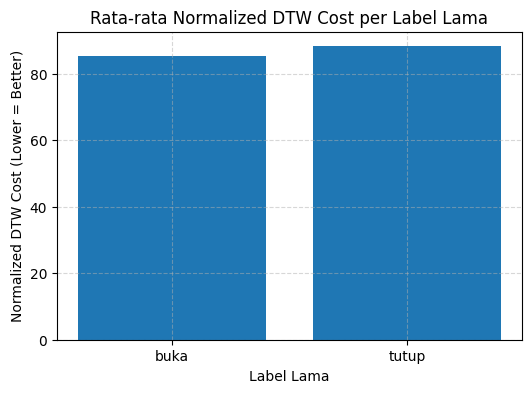

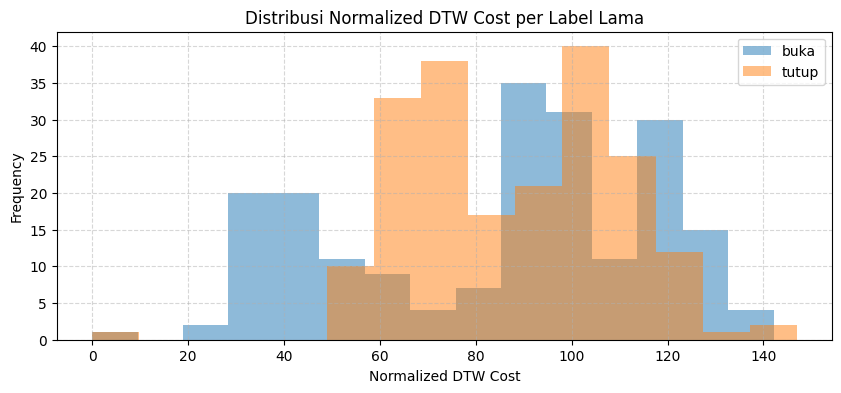

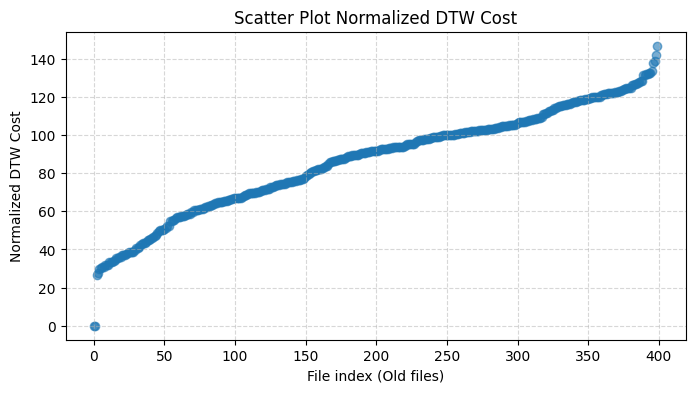


Visualisasi Warp Path (DTW Alignment) untuk file terbaik:
File lama terbaik: rekaman_irna/user1/buka/buka2 (1).wav


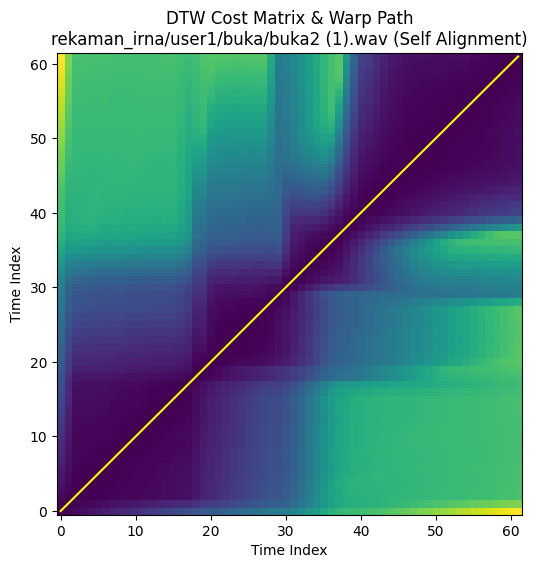

In [48]:
import matplotlib.pyplot as plt

print("\nMenyiapkan visualisasi...")

# Pastikan df punya kolom: old_file, old_label, normalized_cost
summary = df.groupby(['old_label'])['normalized_cost'].mean().reset_index()

# =============================
# 1. BARPLOT rata-rata cost per label lama
# =============================
plt.figure(figsize=(6,4))
plt.bar(summary['old_label'], summary['normalized_cost'])
plt.title("Rata-rata Normalized DTW Cost per Label Lama")
plt.ylabel("Normalized DTW Cost (Lower = Better)")
plt.xlabel("Label Lama")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 2. HISTOGRAM distribusi cost setiap label lama
# =============================
plt.figure(figsize=(10,4))

for label in df['old_label'].unique():
    subset = df[df['old_label'] == label]['normalized_cost']
    plt.hist(subset, bins=15, alpha=0.5, label=f"{label}")

plt.title("Distribusi Normalized DTW Cost per Label Lama")
plt.xlabel("Normalized DTW Cost")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 3. SCATTER PLOT cost semua file
# =============================
df_sorted = df.sort_values('normalized_cost')

plt.figure(figsize=(8,4))
plt.scatter(range(len(df_sorted)), df_sorted['normalized_cost'], alpha=0.6)
plt.title("Scatter Plot Normalized DTW Cost")
plt.xlabel("File index (Old files)")
plt.ylabel("Normalized DTW Cost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 4. DTW Alignment untuk file lama terbaik
# =============================
print("\nVisualisasi Warp Path (DTW Alignment) untuk file terbaik:")

best_match = df.sort_values('normalized_cost').iloc[0]
best_old_file = best_match['old_path']
best_old_label = best_match['old_label']

print(f"File lama terbaik: {best_old_file}")

m_old = old_mfcc[best_old_label][best_old_file]

# Karena TIDAK ada file baru, kita DTW-kan dirinya sendiri
D, wp = librosa.sequence.dtw(X=m_old, Y=m_old)

plt.figure(figsize=(6,6))
plt.imshow(D.T, origin='lower', aspect='auto', interpolation='nearest')
plt.plot([p[0] for p in wp], [p[1] for p in wp], color='yellow')
plt.title(f"DTW Cost Matrix & Warp Path\n{best_old_file} (Self Alignment)")
plt.xlabel("Time Index")
plt.ylabel("Time Index")
plt.show()
